In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from  scipy.stats import norm,skew

In [2]:
train=pd.read_csv("data/train.csv", parse_dates=["datetime"])
test=pd.read_csv("data/test.csv", parse_dates=["datetime"])
train["cnt"]=train["count"]
train.drop(["count"],axis=1,inplace=True)

In [3]:
train.head()
print(train.shape)

(10886, 12)


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
train_id=train.datetime
test_id=test.datetime

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
cnt           10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## EDA

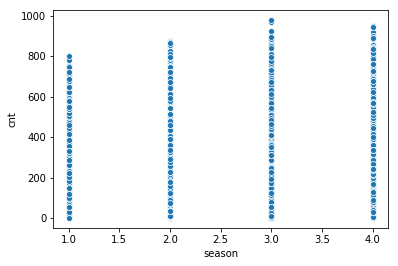

In [7]:
fig,ax=plt.subplots()
sns.scatterplot(x=train.season,y=train.cnt)

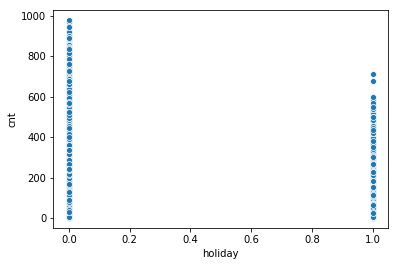

In [8]:
fig,ax=plt.subplots()
sns.scatterplot(x=train.holiday,y=train.cnt)

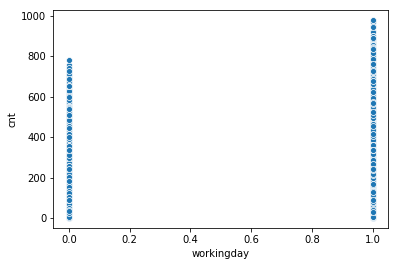

In [9]:
fig,ax=plt.subplots()
sns.scatterplot(x=train.workingday,y=train.cnt)

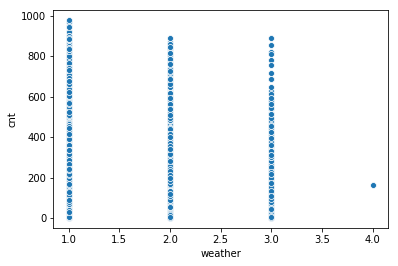

In [10]:
fig,ax=plt.subplots()
sns.scatterplot(x=train.weather,y=train.cnt)

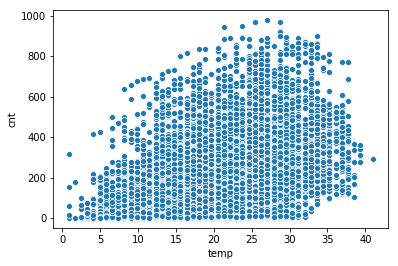

In [11]:
fig,ax=plt.subplots()
sns.scatterplot(x=train.temp,y=train.cnt)

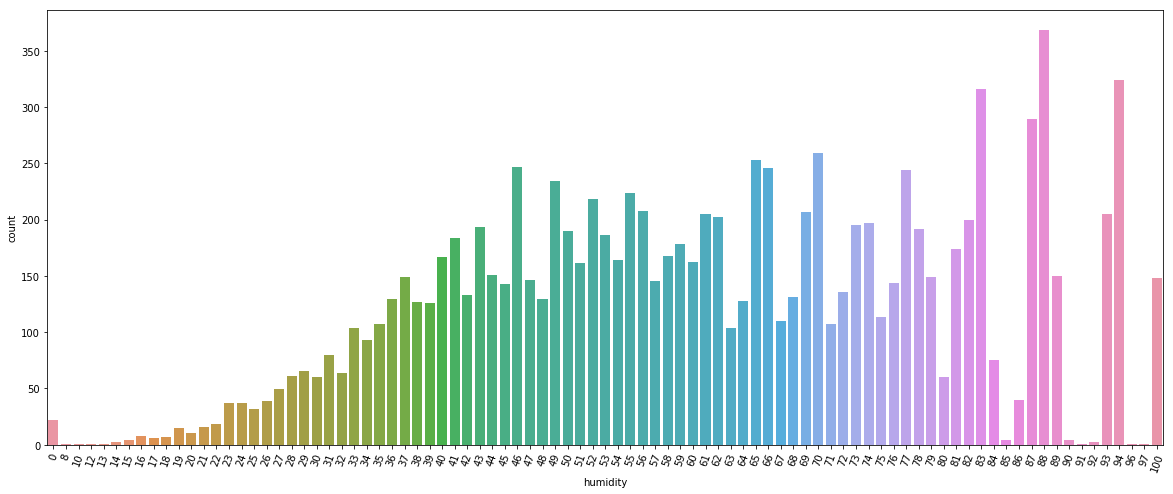

In [12]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
plt.xticks(rotation=70)
sns.countplot(x=train.humidity)

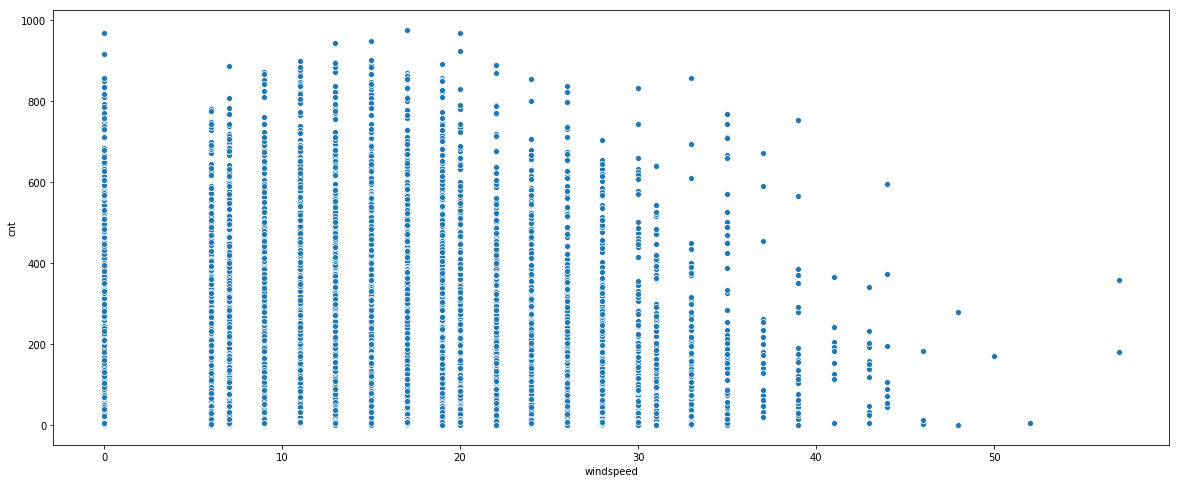

In [13]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(x=train.windspeed,y=train.cnt)

In [14]:
print(train.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')


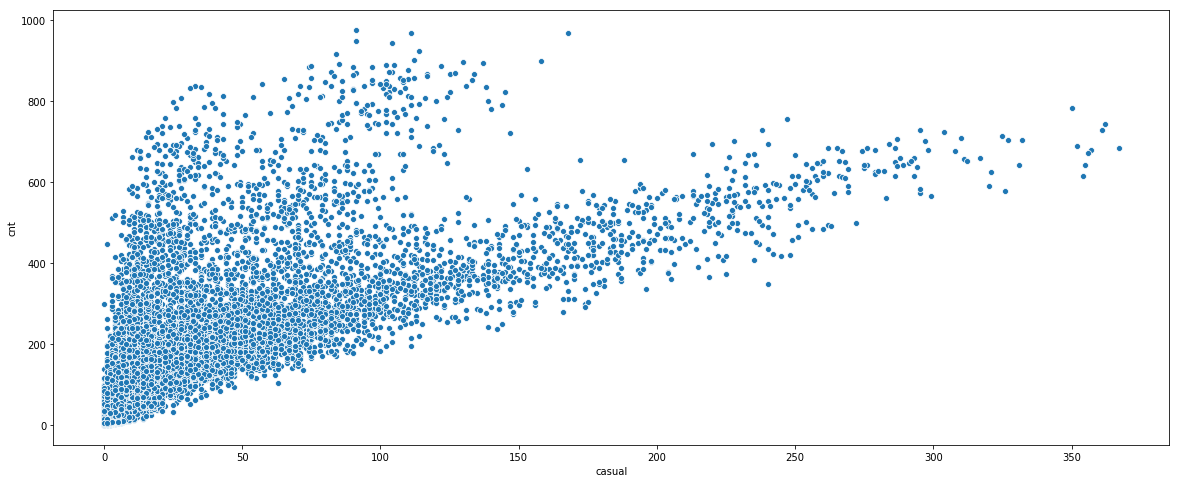

In [15]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(x=train.casual,y=train.cnt)

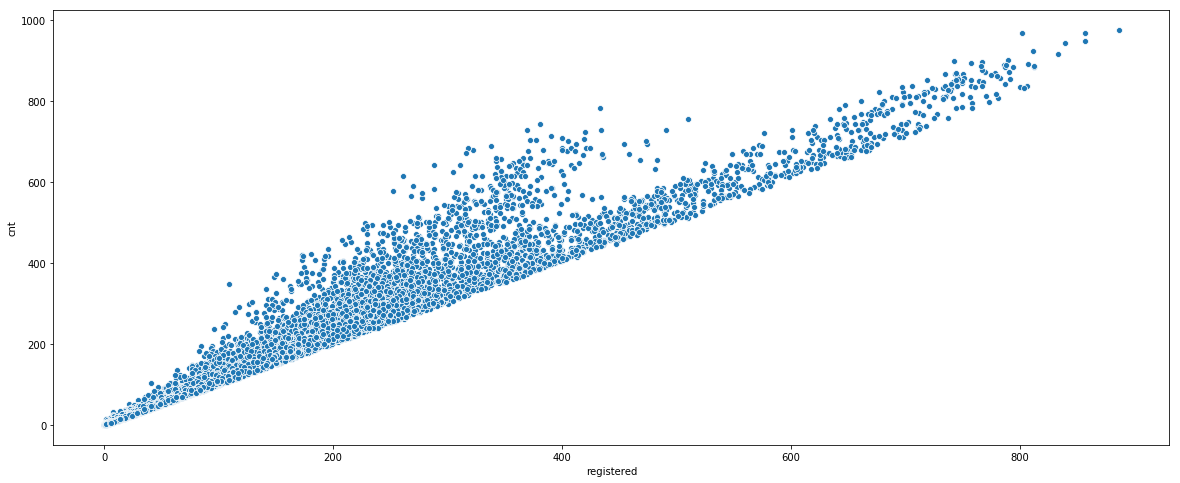

In [16]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(x=train.registered,y=train.cnt)

In [17]:
train2=train.copy()
train2["year"]=train2.datetime.dt.year
train2["month"]=train2.datetime.dt.month
train2["day"]=train2.datetime.dt.day
train2["hour"]=train2.datetime.dt.hour

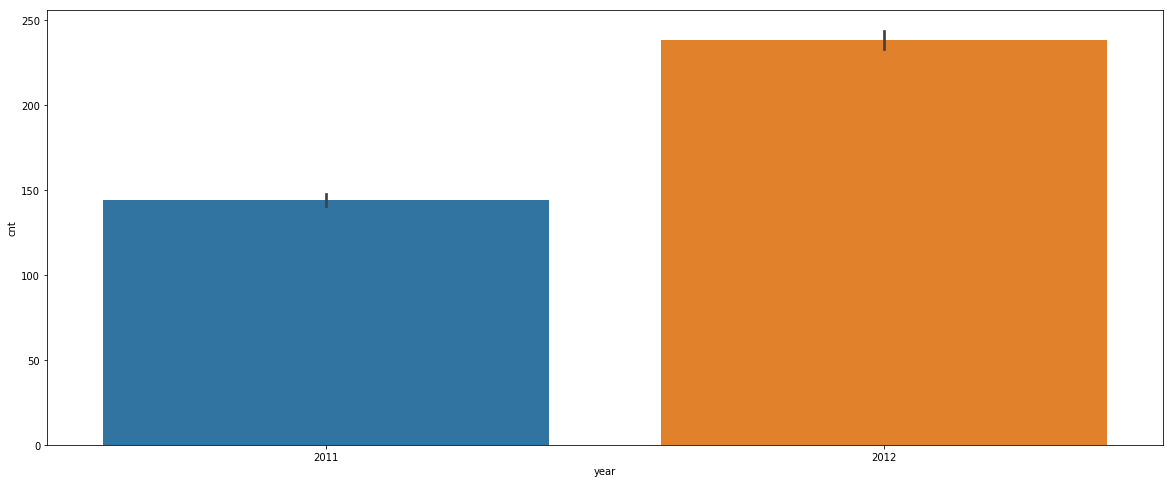

In [18]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
sns.barplot(x=train2.year,y=train2.cnt)

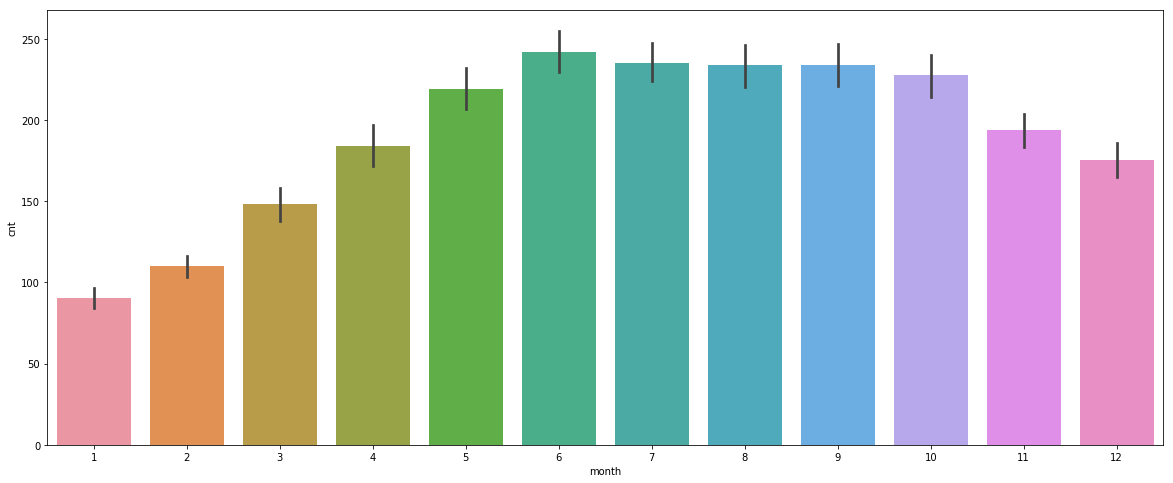

In [19]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
sns.barplot(x=train2.month,y=train2.cnt)

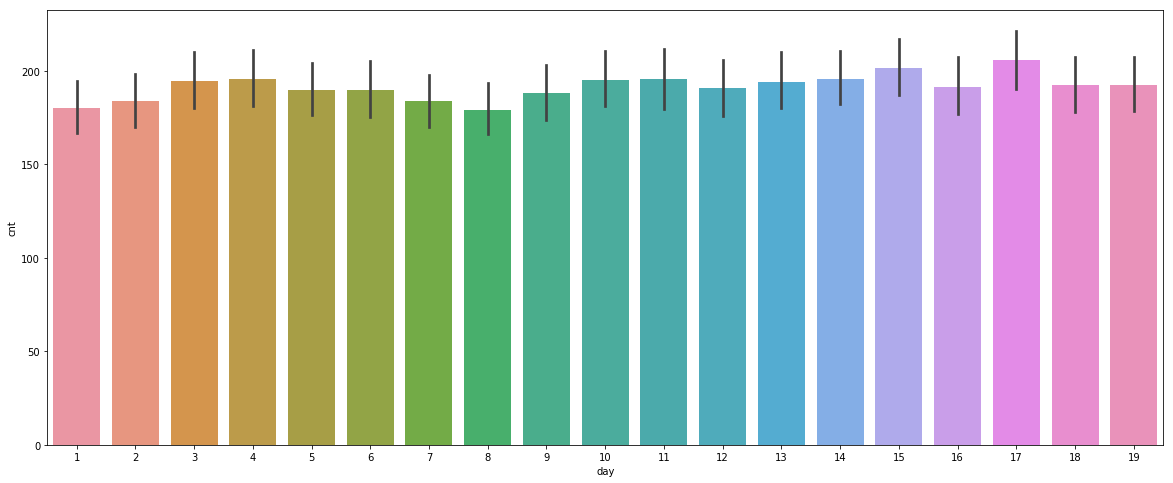

In [20]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
sns.barplot(x=train2.day,y=train2.cnt)

In [21]:
train2["year_month"]=train2.year.astype(str)+"_"+train2.month.astype(str)

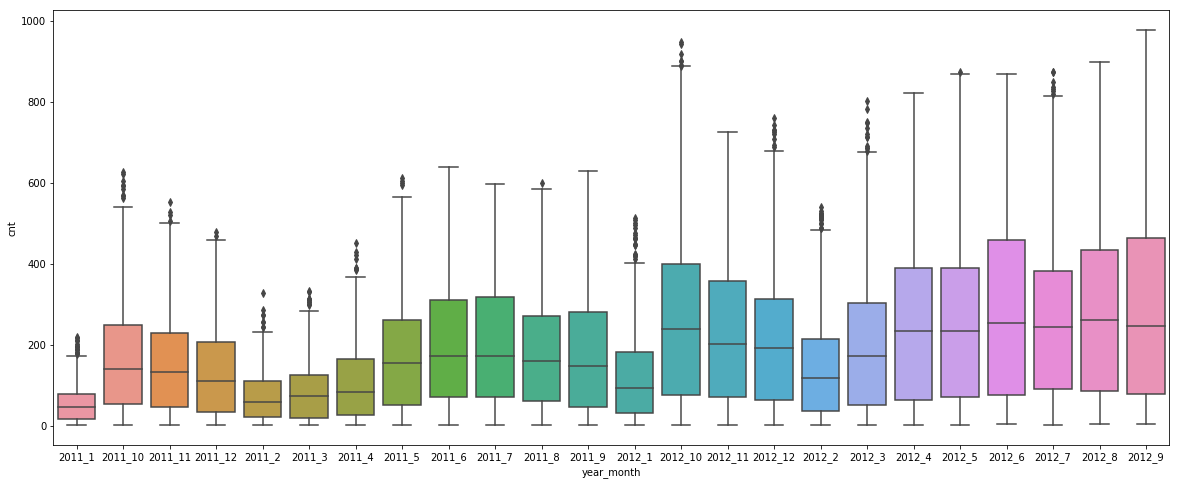

In [22]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
sns.boxplot(x=train2.year_month,y=train.cnt)

191.57413191254824 181.1361335742659


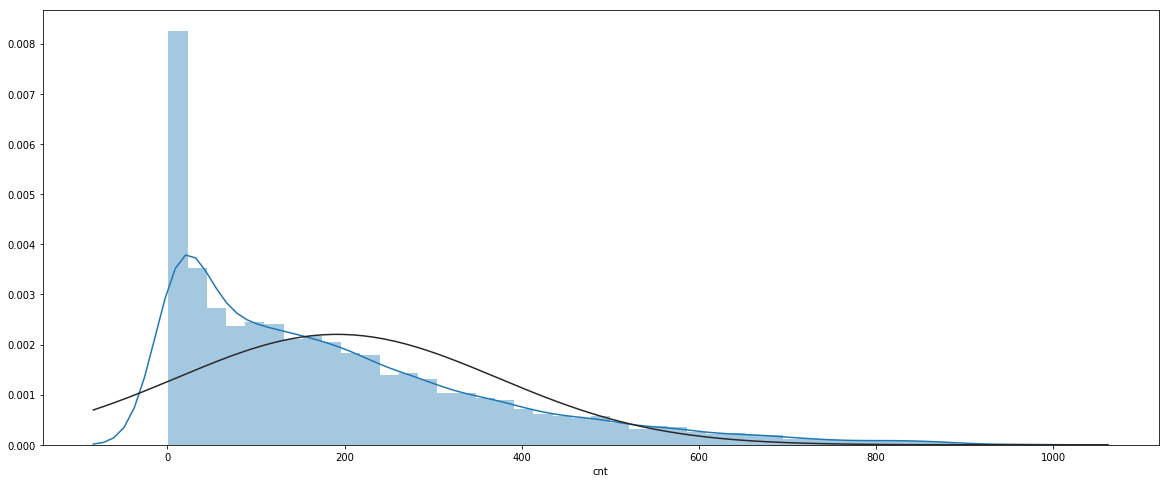

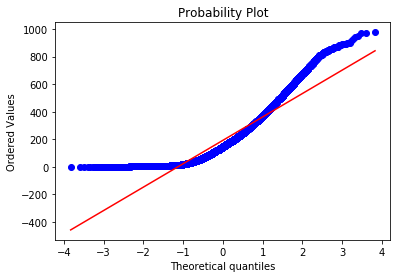

In [23]:
f,ax=plt.subplots(1,1,figsize=(20,8))
sns.distplot(train.cnt,fit=norm)
mu,sigma=norm.fit(train.cnt)
print(mu,sigma)
f=plt.figure()
res=stats.probplot(train.cnt,plot=plt)

4.591363690454027 1.4193889866524083


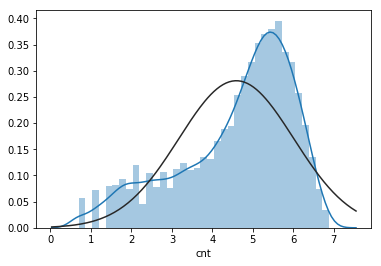

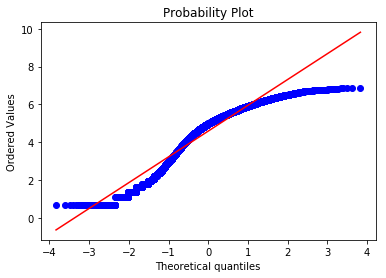

In [24]:
train.cnt=np.log1p(train.cnt)
sns.distplot(train.cnt,fit=norm)
mu,sigma=norm.fit(train.cnt)
print(mu,sigma)
f=plt.figure()
res=stats.probplot(train.cnt,plot=plt)

## Features Engineering

In [25]:
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train.cnt.values
all_data=pd.concat((train,test)).reset_index(drop=True)
all_data.drop(["cnt"],axis=1,inplace=True)
print("all_data size is {}".format(all_data.shape))

all_data size is (17379, 11)


c:\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [26]:
all_data["year"]=all_data.datetime.dt.year
all_data["month"]=all_data.datetime.dt.month
all_data["day"]=all_data.datetime.dt.day
all_data["hour"]=all_data.datetime.dt.hour
all_data["year_month"]=all_data.year.astype(str)+"_"+all_data.month.astype(str)
all_data.drop(["year"],axis=1,inplace=True)
all_data.drop(["month"],axis=1,inplace=True)
all_data.drop(["day"],axis=1,inplace=True)
all_data.drop(["datetime"],axis=1,inplace=True)

In [27]:
all_data.shape

(17379, 12)

### missind Data

In [28]:
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index)
missing_data=pd.DataFrame({"missing ratio":all_data_na})
missing_data.head(100)

,missing ratio
casual,37.361183
registered,37.361183


In [29]:
all_data.drop(["casual","registered"], axis=1, inplace=True)

### data correlation

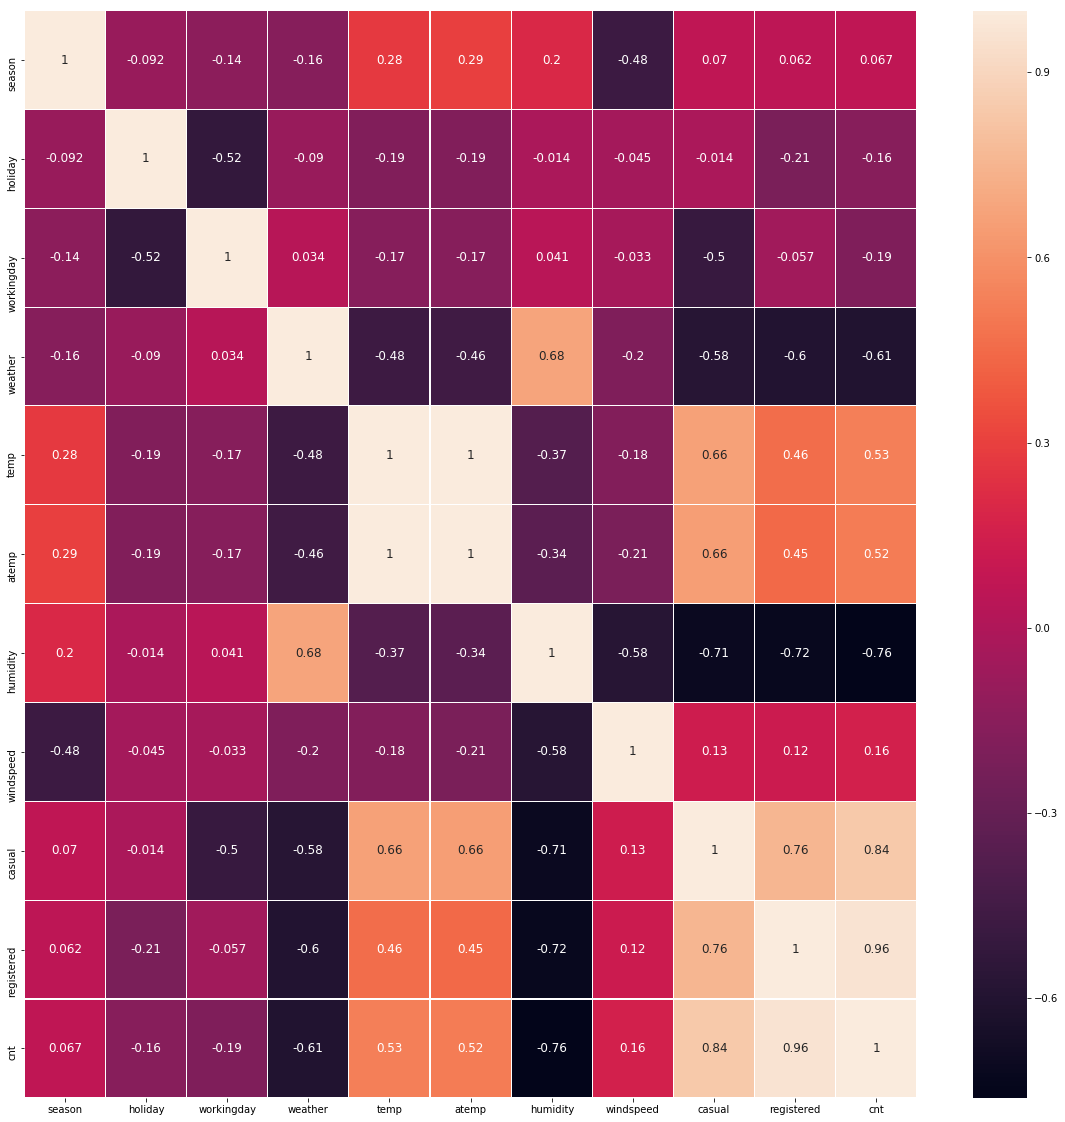

In [30]:
corrmat=train.corr()
f,ax=plt.subplots(1,1,figsize=(20,20))
sns.heatmap(corrmat.astype(float).corr(),linewidths=0.1,vmax=1.0,annot=True,annot_kws={'size':12})

## transforming some numerial variables that are really categorical

In [31]:
all_data[["temp","windspeed"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
temp         17379 non-null float64
windspeed    17379 non-null float64
dtypes: float64(2)
memory usage: 271.7 KB


In [32]:
all_data.describe()

,atemp,holiday,humidity,season,temp,weather,windspeed,workingday,hour
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,23.788755,0.028770,62.722884,2.501640,20.376474,1.425283,12.736540,0.682721,11.546752
std,8.592511,0.167165,19.292983,1.106918,7.894801,0.639357,8.196795,0.465431,6.914405
min,0.000000,0.000000,0.000000,1.000000,0.820000,1.000000,0.000000,0.000000,0.000000
25%,16.665000,0.000000,48.000000,2.000000,13.940000,1.000000,7.001500,0.000000,6.000000
50%,24.240000,0.000000,63.000000,3.000000,20.500000,1.000000,12.998000,1.000000,12.000000
75%,31.060000,0.000000,78.000000,3.000000,27.060000,2.000000,16.997900,1.000000,18.000000
max,50.000000,1.000000,100.000000,4.000000,41.000000,4.000000,56.996900,1.000000,23.000000


In [33]:
columns=["season","holiday","workingday","weather","workingday","hour"]
for col in columns:
    all_data[col]=all_data[col].astype(str)

In [34]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 10 columns):
atemp         17379 non-null float64
holiday       17379 non-null object
humidity      17379 non-null int64
season        17379 non-null object
temp          17379 non-null float64
weather       17379 non-null object
windspeed     17379 non-null float64
workingday    17379 non-null object
hour          17379 non-null object
year_month    17379 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 1.3+ MB


In [35]:
all_data.columns

Index(['atemp', 'holiday', 'humidity', 'season', 'temp', 'weather',
       'windspeed', 'workingday', 'hour', 'year_month'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder
cols=['holiday', 'season', 'weather','workingday', 'hour', 'year_month']
for c in cols:
    lbl=LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c]=lbl.transform(list(all_data[c].values))

### skewed features

In [37]:
numeric_feats=all_data.dtypes[all_data.dtypes != object].index

In [38]:
numeric_feats

Index(['atemp', 'holiday', 'humidity', 'season', 'temp', 'weather',
       'windspeed', 'workingday', 'hour', 'year_month'],
      dtype='object')

In [39]:
skewed_feats=all_data[numeric_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending=True)
skewness=pd.DataFrame({"skewness":skewed_feats})

In [40]:
skewness

,skewness
workingday,-0.785190
humidity,-0.111278
atemp,-0.090421
year_month,-0.007447
temp,-0.006020
season,-0.005415
hour,0.008922
windspeed,0.574856
weather,1.227941
holiday,5.638051


In [41]:
from scipy.special import boxcox1p
lam = 0.15
all_data["weather"]=boxcox1p(all_data["weather"],lam)

In [42]:
all_data.shape

(17379, 10)

In [43]:
all_data=pd.get_dummies(all_data)

In [44]:
all_data.shape

(17379, 10)

In [45]:
all_data.head(100)

,atemp,holiday,humidity,season,temp,weather,windspeed,workingday,hour,year_month
0,14.395,0,81,0,9.84,0.0,0.0000,0,0,0
1,13.635,0,80,0,9.02,0.0,0.0000,0,1,0
2,13.635,0,80,0,9.02,0.0,0.0000,0,12,0
3,14.395,0,75,0,9.84,0.0,0.0000,0,17,0
4,14.395,0,75,0,9.84,0.0,0.0000,0,18,0
...,...,...,...,...,...,...,...,...,...,...
95,11.365,0,48,0,9.84,0.0,15.0013,1,18,0
96,11.365,0,47,0,9.02,0.0,11.0014,1,19,0
97,9.850,0,47,0,8.20,0.0,15.0013,1,20,0
98,9.090,0,43,0,7.38,0.0,12.9980,1,21,0


In [46]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Modeling

In [47]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

c:\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [48]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## Base models

In [49]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [50]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [51]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [52]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [53]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [54]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [55]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 1.2319 (0.0349)



In [56]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 1.2319 (0.0349)



In [57]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 1.2683 (0.1741)



In [58]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.4187 (0.1038)



In [59]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.4318 (0.1135)



In [60]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.5495 (0.0726)



# Stacking Model

In [61]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [62]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.9542 (0.0344)



In [63]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [64]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.4177 (0.1091)


In [65]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [66]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.2478171871981334


In [67]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.29305503991951887


In [68]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.46315501918315843


In [69]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.26806110407005845


In [70]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [73]:
sub = pd.DataFrame()
sub['datetime'] = test_id
sub['count'] = ensemble

from datetime import datetime
now=datetime.now()
sub.to_csv("data/{0:02d}{1:02d}{2:02d}{3:02d}_ensemble_submission.csv".format(now.year,now.month,now.day,now.hour),index=False)

In [ ]:
Name
Submitted
Wait time
Execution time
Score
2020011916_ensemble_submission.csv
4 minutes ago
0 seconds
0 seconds
0.40842



In [74]:
324/3251

0.09966164257151645